***In this project, we are forecasting the number of malaria cases in West Africa***

In [1]:
#Mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade keras tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing inst

In [3]:
!pip install scikeras

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasRegressor
import keras
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [5]:
# The name of my dataframe is countries_df
countries_df = pd.read_csv('/content/drive/My Drive/AI_Final_Project/MALARIA_CONF_CASES.csv')

# Source: https://apps.who.int/gho/data/node.main.MALARIACONFCASES?lang=en

In [6]:
countries_df

,Unnamed: 0,Number of confirmed malaria cases,Number of confirmed malaria cases.1,Number of confirmed malaria cases.2,Number of confirmed malaria cases.3,Number of confirmed malaria cases.4,Number of confirmed malaria cases.5,Number of confirmed malaria cases.6,Number of confirmed malaria cases.7,Number of confirmed malaria cases.8,...,Number of confirmed malaria cases.12,Number of confirmed malaria cases.13,Number of confirmed malaria cases.14,Number of confirmed malaria cases.15,Number of confirmed malaria cases.16,Number of confirmed malaria cases.17,Number of confirmed malaria cases.18,Number of confirmed malaria cases.19,Number of confirmed malaria cases.20,Number of confirmed malaria cases.21
0,"Countries, territories and areas",2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
1,Afghanistan,86 263,105 295,173 860,248 689,313 086,241 233,119 859,106 478,52 965,...,65 000,81 574,92 202,86 129,116 444,242 022,360 940,414 611,50 850,94 475
2,Algeria,1 164,2 726,1 014,1 242,453,432,747,266,603,...,94,196,288,117,299,163,427,307,435,541
3,Angola,8 325 921,6 599 327,7 054 978,5 150 575,3 874 892,3 794 253,2 769 305,2 298 979,1 999 868,...,1 573 422,1 377 992,1 533 485,1 082 398,889 572,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,0,0,28,18,9,11,15,11,...,92,105,328,172,231,116,124,125,215,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Venezuela (Bolivarian Republic of),194 057,232 757,492 753,522 059,525 897,301 466,137 996,91 918,80 320,...,35 828,32 037,41 749,37 062,45 049,46 655,31 719,29 491,20 006,29 736
105,Viet Nam,467,1 422,4 765,4 813,4 548,4 161,9 331,15 752,17 128,...,16 130,11 355,16 389,22 637,19 496,24 909,38 790,47 807,68 699,74 316
106,Yemen,180 339,164 066,165 899,157 900,143 333,99 700,76 259,86 707,102 778,...,55 454,44 206,67 677,55 000,44 150,48 756,50 811,75 508,NaN,NaN
107,Zambia,6 769 142,8 121 215,5 147 350,5 039 679,5 505 639,4 851 319,4 184 661,4 077 547,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
countries_df.columns.to_list()

['Unnamed: 0',
 'Number of confirmed malaria cases',
 'Number of confirmed malaria cases.1',
 'Number of confirmed malaria cases.2',
 'Number of confirmed malaria cases.3',
 'Number of confirmed malaria cases.4',
 'Number of confirmed malaria cases.5',
 'Number of confirmed malaria cases.6',
 'Number of confirmed malaria cases.7',
 'Number of confirmed malaria cases.8',
 'Number of confirmed malaria cases.9',
 'Number of confirmed malaria cases.10',
 'Number of confirmed malaria cases.11',
 'Number of confirmed malaria cases.12',
 'Number of confirmed malaria cases.13',
 'Number of confirmed malaria cases.14',
 'Number of confirmed malaria cases.15',
 'Number of confirmed malaria cases.16',
 'Number of confirmed malaria cases.17',
 'Number of confirmed malaria cases.18',
 'Number of confirmed malaria cases.19',
 'Number of confirmed malaria cases.20',
 'Number of confirmed malaria cases.21']

In [8]:
# Since our project focus is in Western Africa, we extract those countries from the 'countries_df'
# The list of countries in West Africa
# Benin, Burkina Faso, Cape Verde, Côte d’Ivoire, Gambia, Ghana, Guinea, Guinea-Bissau, Liberia, Mali, Mauritania, Niger, Nigeria, Senegal, Sierra Leone,Togo
# Soure: https://www.travel-tramp.com/how-many-countries-are-in-west-africa/

west_african_countries = ['Benin', 'Burkina Faso', 'Cabo Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone','Togo']

In [9]:
# Filter the DataFrame based on 'Unnamed: 0' column
# This is to obtain the West African countries only.
west_african_countries_df = countries_df[countries_df['Unnamed: 0'].isin(west_african_countries)]

In [10]:
west_african_countries_df

,Unnamed: 0,Number of confirmed malaria cases,Number of confirmed malaria cases.1,Number of confirmed malaria cases.2,Number of confirmed malaria cases.3,Number of confirmed malaria cases.4,Number of confirmed malaria cases.5,Number of confirmed malaria cases.6,Number of confirmed malaria cases.7,Number of confirmed malaria cases.8,...,Number of confirmed malaria cases.12,Number of confirmed malaria cases.13,Number of confirmed malaria cases.14,Number of confirmed malaria cases.15,Number of confirmed malaria cases.16,Number of confirmed malaria cases.17,Number of confirmed malaria cases.18,Number of confirmed malaria cases.19,Number of confirmed malaria cases.20,Number of confirmed malaria cases.21
9,Benin,2 876 368,2 516 465,2 895 878,1 975 812,1 933 912,1 610 790,1 721 626,1 309 238,1 090 602,...,889 597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Burkina Faso,11 791 638,10 600 340,5 877 426,10 278 970,10 557 260,9 779 411,7 015 446,5 428 655,3 769 051,...,182 527,36 514,44 246,44 265,21 335,18 256,NaN,NaN,NaN,NaN
16,Cote d'Ivoire,7 295 068,4 980 640,5 935 178,4 766 477,4 034 781,3 754 504,3 375 904,3 712 831,2 524 326,...,7 388,3 527,NaN,NaN,67,293,1 585,7 628,11 936,15 705
17,Cabo Verde,21,10,40,21,446,77,27,46,46,...,65,35,18,80,68,45,68,76,107,144
39,Gambia,77 287,75 801,53 386,87 448,78 040,162 739,246 348,168 256,242 513,...,50 378,39 164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Ghana,5 747 585,5 172 803,6 115 267,4 931 454,7 003 155,5 428 979,5 657 096,3 415 912,1 643 642,...,1 104 370,1 094 483,476 484,472 255,655 093,475 441,NaN,NaN,NaN,NaN
43,Guinea,2 422 374,2 008 976,2 143 225,1 214 996,1 335 323,992 146,810 979,660 207,211 257,...,35 841,33 405,44 518,54 227,50 452,103 069,107 925,16 561,6 238,4 800
44,Guinea-Bissau,NaN,NaN,160 907,171 075,152 619,156 471,150 085,97 424,54 584,...,11 757,11 299,14 284,15 120,14 659,NaN,NaN,NaN,NaN,NaN
56,Liberia,912 436,NaN,915 845,NaN,1 093 115,1 191 137,941 711,881 224,1 244 220,...,839 581,606 952,492 272,761 415,44 875,NaN,NaN,NaN,NaN,NaN
60,Mali,3 204 130,2 666 266,3 221 535,2 345 475,2 277 218,2 311 098,2 454 508,2 039 853,1 506 940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Renaming the column names
new_column_names = {'Unnamed: 0': 'Country',
                    'Number of confirmed malaria cases': '2021',
                    'Number of confirmed malaria cases.1': '2020',
                    'Number of confirmed malaria cases.2': '2019',
                    'Number of confirmed malaria cases.3': '2018',
                    'Number of confirmed malaria cases.4': '2017',
                    'Number of confirmed malaria cases.5': '2016',
                    'Number of confirmed malaria cases.6': '2015',
                    'Number of confirmed malaria cases.7': '2014',
                    'Number of confirmed malaria cases.8': '2013',
                    'Number of confirmed malaria cases.9': '2012',
                    'Number of confirmed malaria cases.10': '2011',
                    'Number of confirmed malaria cases.11': '2010',
                    'Number of confirmed malaria cases.12': '2009',
                    'Number of confirmed malaria cases.13': '2008',
                    'Number of confirmed malaria cases.14': '2007',
                    'Number of confirmed malaria cases.15': '2006',
                    'Number of confirmed malaria cases.16': '2005',
                    'Number of confirmed malaria cases.17': '2004',
                    'Number of confirmed malaria cases.18': '2003',
                    'Number of confirmed malaria cases.19': '2002',
                    'Number of confirmed malaria cases.20': '2001',
                    'Number of confirmed malaria cases.21': '2000'}

In [12]:
west_african_countries_df.rename(columns=new_column_names, inplace=True)

<ipython-input-12-b5b0330a404d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_african_countries_df.rename(columns=new_column_names, inplace=True)


In [13]:
west_african_countries_df

,Country,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
9,Benin,2 876 368,2 516 465,2 895 878,1 975 812,1 933 912,1 610 790,1 721 626,1 309 238,1 090 602,...,889 597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Burkina Faso,11 791 638,10 600 340,5 877 426,10 278 970,10 557 260,9 779 411,7 015 446,5 428 655,3 769 051,...,182 527,36 514,44 246,44 265,21 335,18 256,NaN,NaN,NaN,NaN
16,Cote d'Ivoire,7 295 068,4 980 640,5 935 178,4 766 477,4 034 781,3 754 504,3 375 904,3 712 831,2 524 326,...,7 388,3 527,NaN,NaN,67,293,1 585,7 628,11 936,15 705
17,Cabo Verde,21,10,40,21,446,77,27,46,46,...,65,35,18,80,68,45,68,76,107,144
39,Gambia,77 287,75 801,53 386,87 448,78 040,162 739,246 348,168 256,242 513,...,50 378,39 164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Ghana,5 747 585,5 172 803,6 115 267,4 931 454,7 003 155,5 428 979,5 657 096,3 415 912,1 643 642,...,1 104 370,1 094 483,476 484,472 255,655 093,475 441,NaN,NaN,NaN,NaN
43,Guinea,2 422 374,2 008 976,2 143 225,1 214 996,1 335 323,992 146,810 979,660 207,211 257,...,35 841,33 405,44 518,54 227,50 452,103 069,107 925,16 561,6 238,4 800
44,Guinea-Bissau,NaN,NaN,160 907,171 075,152 619,156 471,150 085,97 424,54 584,...,11 757,11 299,14 284,15 120,14 659,NaN,NaN,NaN,NaN,NaN
56,Liberia,912 436,NaN,915 845,NaN,1 093 115,1 191 137,941 711,881 224,1 244 220,...,839 581,606 952,492 272,761 415,44 875,NaN,NaN,NaN,NaN,NaN
60,Mali,3 204 130,2 666 266,3 221 535,2 345 475,2 277 218,2 311 098,2 454 508,2 039 853,1 506 940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Data Preprocessing***

In [14]:
west_african_countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 9 to 97
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  16 non-null     object
 1   2021     15 non-null     object
 2   2020     13 non-null     object
 3   2019     16 non-null     object
 4   2018     15 non-null     object
 5   2017     16 non-null     object
 6   2016     16 non-null     object
 7   2015     16 non-null     object
 8   2014     16 non-null     object
 9   2013     15 non-null     object
 10  2012     15 non-null     object
 11  2011     15 non-null     object
 12  2010     15 non-null     object
 13  2009     15 non-null     object
 14  2008     14 non-null     object
 15  2007     9 non-null      object
 16  2006     11 non-null     object
 17  2005     11 non-null     object
 18  2004     9 non-null      object
 19  2003     7 non-null      object
 20  2002     6 non-null      object
 21  2001     6 non-null      object
 22  2000

In [15]:
west_african_countries_df.describe()

,Country,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
count,16,15,13,16,15,16,16,16,16,15,...,15,14,9,11,11,9,7,6,6,5
unique,16,15,13,16,15,16,16,16,16,15,...,15,14,9,11,11,9,7,6,6,5
top,Benin,2 876 368,2 516 465,2 895 878,1 975 812,1 933 912,1 610 790,1 721 626,1 309 238,1 090 602,...,889 597,36 514,44 246,44 265,21 335,18 256,1 585,7 628,11 936,15 705
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
west_african_countries_df.head()

,Country,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
9,Benin,2 876 368,2 516 465,2 895 878,1 975 812,1 933 912,1 610 790,1 721 626,1 309 238,1 090 602,...,889 597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Burkina Faso,11 791 638,10 600 340,5 877 426,10 278 970,10 557 260,9 779 411,7 015 446,5 428 655,3 769 051,...,182 527,36 514,44 246,44 265,21 335,18 256,NaN,NaN,NaN,NaN
16,Cote d'Ivoire,7 295 068,4 980 640,5 935 178,4 766 477,4 034 781,3 754 504,3 375 904,3 712 831,2 524 326,...,7 388,3 527,NaN,NaN,67,293,1 585,7 628,11 936,15 705
17,Cabo Verde,21,10,40,21,446,77,27,46,46,...,65,35,18,80,68,45,68,76,107,144
39,Gambia,77 287,75 801,53 386,87 448,78 040,162 739,246 348,168 256,242 513,...,50 378,39 164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Converting the object columns into numeric*

In [17]:
# Identify numeric columns excluding the 'Country' column
numeric_columns = west_african_countries_df.columns.difference(['Country'])

# Remove spaces before numbers and convert numeric columns to numeric type
west_african_countries_df[numeric_columns] = west_african_countries_df[numeric_columns].replace(' ', '', regex=True).apply(pd.to_numeric, errors='coerce')

<ipython-input-17-54dfd8a44bf9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_african_countries_df[numeric_columns] = west_african_countries_df[numeric_columns].replace(' ', '', regex=True).apply(pd.to_numeric, errors='coerce')


In [18]:
west_african_countries_df

,Country,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
9,Benin,2876368.0,2516465.0,2895878,1975812.0,1933912,1610790,1721626,1309238,1090602.0,...,889597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Burkina Faso,11791638.0,10600340.0,5877426,10278970.0,10557260,9779411,7015446,5428655,3769051.0,...,182527.0,36514.0,44246.0,44265.0,21335.0,18256.0,NaN,NaN,NaN,NaN
16,Cote d'Ivoire,7295068.0,4980640.0,5935178,4766477.0,4034781,3754504,3375904,3712831,2524326.0,...,7388.0,3527.0,NaN,NaN,67.0,293.0,1585.0,7628.0,11936.0,15705.0
17,Cabo Verde,21.0,10.0,40,21.0,446,77,27,46,46.0,...,65.0,35.0,18.0,80.0,68.0,45.0,68.0,76.0,107.0,144.0
39,Gambia,77287.0,75801.0,53386,87448.0,78040,162739,246348,168256,242513.0,...,50378.0,39164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Ghana,5747585.0,5172803.0,6115267,4931454.0,7003155,5428979,5657096,3415912,1643642.0,...,1104370.0,1094483.0,476484.0,472255.0,655093.0,475441.0,NaN,NaN,NaN,NaN
43,Guinea,2422374.0,2008976.0,2143225,1214996.0,1335323,992146,810979,660207,211257.0,...,35841.0,33405.0,44518.0,54227.0,50452.0,103069.0,107925.0,16561.0,6238.0,4800.0
44,Guinea-Bissau,NaN,NaN,160907,171075.0,152619,156471,150085,97424,54584.0,...,11757.0,11299.0,14284.0,15120.0,14659.0,NaN,NaN,NaN,NaN,NaN
56,Liberia,912436.0,NaN,915845,NaN,1093115,1191137,941711,881224,1244220.0,...,839581.0,606952.0,492272.0,761415.0,44875.0,NaN,NaN,NaN,NaN,NaN
60,Mali,3204130.0,2666266.0,3221535,2345475.0,2277218,2311098,2454508,2039853,1506940.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
west_african_countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 9 to 97
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  16 non-null     object 
 1   2021     15 non-null     float64
 2   2020     13 non-null     float64
 3   2019     16 non-null     int64  
 4   2018     15 non-null     float64
 5   2017     16 non-null     int64  
 6   2016     16 non-null     int64  
 7   2015     16 non-null     int64  
 8   2014     16 non-null     int64  
 9   2013     15 non-null     float64
 10  2012     15 non-null     float64
 11  2011     15 non-null     float64
 12  2010     15 non-null     float64
 13  2009     15 non-null     float64
 14  2008     14 non-null     float64
 15  2007     9 non-null      float64
 16  2006     11 non-null     float64
 17  2005     11 non-null     float64
 18  2004     9 non-null      float64
 19  2003     7 non-null      float64
 20  2002     6 non-null      float64
 21  2001     6 non-nul

*Imputing*

In [20]:
# Identify numeric columns excluding the 'Country' column
numeric_columns = west_african_countries_df.columns.difference(['Country'])

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy='mean')
west_african_countries_df[numeric_columns] = imputer.fit_transform(west_african_countries_df[numeric_columns])

<ipython-input-20-fcf8e67e971f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_african_countries_df[numeric_columns] = imputer.fit_transform(west_african_countries_df[numeric_columns])


In [21]:
west_african_countries_df

,Country,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
9,Benin,2.876368e+06,2.516465e+06,2895878.0,1.975812e+06,1933912.0,1610790.0,1721626.0,1309238.0,1.090602e+06,...,8.895970e+05,2.462597e+05,175885.222222,132178.727273,83462.909091,79381.666667,29969.142857,10941.5,9566.833333,18138.2
14,Burkina Faso,1.179164e+07,1.060034e+07,5877426.0,1.027897e+07,10557260.0,9779411.0,7015446.0,5428655.0,3.769051e+06,...,1.825270e+05,3.651400e+04,44246.000000,44265.000000,21335.000000,18256.000000,29969.142857,10941.5,9566.833333,18138.2
16,Cote d'Ivoire,7.295068e+06,4.980640e+06,5935178.0,4.766477e+06,4034781.0,3754504.0,3375904.0,3712831.0,2.524326e+06,...,7.388000e+03,3.527000e+03,175885.222222,132178.727273,67.000000,293.000000,1585.000000,7628.0,11936.000000,15705.0
17,Cabo Verde,2.100000e+01,1.000000e+01,40.0,2.100000e+01,446.0,77.0,27.0,46.0,4.600000e+01,...,6.500000e+01,3.500000e+01,18.000000,80.000000,68.000000,45.000000,68.000000,76.0,107.000000,144.0
39,Gambia,7.728700e+04,7.580100e+04,53386.0,8.744800e+04,78040.0,162739.0,246348.0,168256.0,2.425130e+05,...,5.037800e+04,3.916400e+04,175885.222222,132178.727273,83462.909091,79381.666667,29969.142857,10941.5,9566.833333,18138.2
41,Ghana,5.747585e+06,5.172803e+06,6115267.0,4.931454e+06,7003155.0,5428979.0,5657096.0,3415912.0,1.643642e+06,...,1.104370e+06,1.094483e+06,476484.000000,472255.000000,655093.000000,475441.000000,29969.142857,10941.5,9566.833333,18138.2
43,Guinea,2.422374e+06,2.008976e+06,2143225.0,1.214996e+06,1335323.0,992146.0,810979.0,660207.0,2.112570e+05,...,3.584100e+04,3.340500e+04,44518.000000,54227.000000,50452.000000,103069.000000,107925.000000,16561.0,6238.000000,4800.0
44,Guinea-Bissau,4.213505e+06,3.992863e+06,160907.0,1.710750e+05,152619.0,156471.0,150085.0,97424.0,5.458400e+04,...,1.175700e+04,1.129900e+04,14284.000000,15120.000000,14659.000000,79381.666667,29969.142857,10941.5,9566.833333,18138.2
56,Liberia,9.124360e+05,3.992863e+06,915845.0,3.177631e+06,1093115.0,1191137.0,941711.0,881224.0,1.244220e+06,...,8.395810e+05,6.069520e+05,492272.000000,761415.000000,44875.000000,79381.666667,29969.142857,10941.5,9566.833333,18138.2
60,Mali,3.204130e+06,2.666266e+06,3221535.0,2.345475e+06,2277218.0,2311098.0,2454508.0,2039853.0,1.506940e+06,...,3.592263e+05,2.462597e+05,175885.222222,132178.727273,83462.909091,79381.666667,29969.142857,10941.5,9566.833333,18138.2


***Exploratory Data Analysis***

In [22]:
# Obtaining the population of each West African country from 2000 to 2021.
# I would them to find the ratio of the number of malaria cases to the population and plot the ratio on a scatterplot

In [23]:
#The 'west_african_countries_df' was split into 16 dataframes (since there are 16 countries). The reasons are as follows:

# To be able to create scatterplots for each individual country. This allows for a visual comparison of malaria cases over the years for different countries.
# This is valuable for identifying trends, variations, or unique patterns specific to each country.

# Get the list of unique countries
countries = west_african_countries_df['Country'].unique()

# Create a dictionary of DataFrames, where each key is a country and the corresponding value is the DataFrame for that country
country_dataframes = {country: west_african_countries_df[west_african_countries_df['Country'] == country].reset_index(drop=True) for country in countries}

In [24]:
country_dataframes

{'Benin':   Country       2021       2020       2019       2018       2017       2016  \
 0   Benin  2876368.0  2516465.0  2895878.0  1975812.0  1933912.0  1610790.0   
 
         2015       2014       2013  ...      2009           2008  \
 0  1721626.0  1309238.0  1090602.0  ...  889597.0  246259.714286   
 
             2007           2006          2005          2004          2003  \
 0  175885.222222  132178.727273  83462.909091  79381.666667  29969.142857   
 
       2002         2001     2000  
 0  10941.5  9566.833333  18138.2  
 
 [1 rows x 23 columns],
 'Burkina Faso':         Country        2021        2020       2019        2018        2017  \
 0  Burkina Faso  11791638.0  10600340.0  5877426.0  10278970.0  10557260.0   
 
         2016       2015       2014       2013  ...      2009     2008  \
 0  9779411.0  7015446.0  5428655.0  3769051.0  ...  182527.0  36514.0   
 
       2007     2006     2005     2004          2003     2002         2001  \
 0  44246.0  44265.0  21335.0

*Benin*

In [25]:
# Example: Accessing the DataFrame for Benin
benin_df = country_dataframes[countries[0]]

# Print the first country DataFrame
benin_df

,Country,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Benin,2876368.0,2516465.0,2895878.0,1975812.0,1933912.0,1610790.0,1721626.0,1309238.0,1090602.0,...,889597.0,246259.714286,175885.222222,132178.727273,83462.909091,79381.666667,29969.142857,10941.5,9566.833333,18138.2


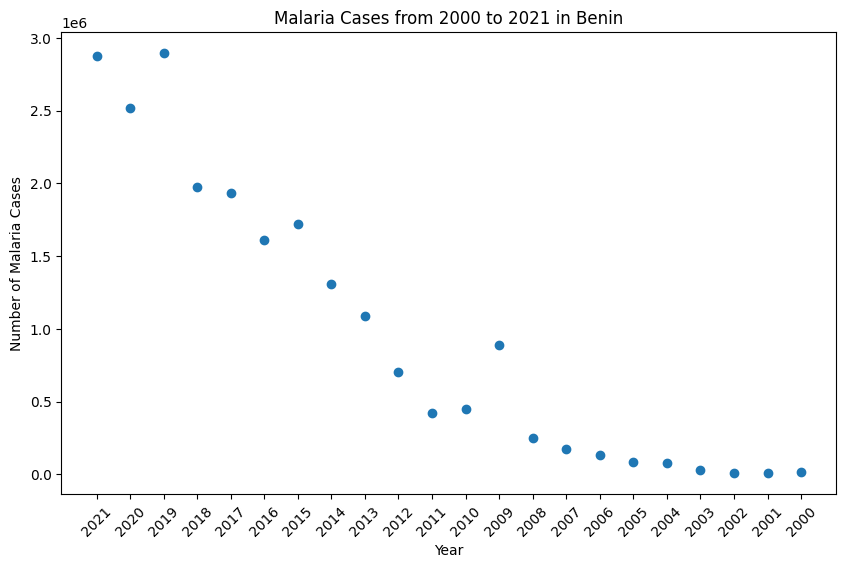

In [26]:
# Extracting relevant columns for scatterplot
years = benin_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = benin_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title('Malaria Cases from 2000 to 2021 in Benin')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Benin: There was a gradual increase of Malaria cases from 2000 to 2008. The number of cases peaked in 2013 from approximately half a million cases in 2008 to to nearly 3 million in 2021

*Burkina Faso*

In [27]:
# Example: Accessing the DataFrame for Burkina Faso
burkina_faso_df = country_dataframes[countries[1]]

# Print the first country DataFrame
print(burkina_faso_df)

        Country        2021        2020       2019        2018        2017  \
0  Burkina Faso  11791638.0  10600340.0  5877426.0  10278970.0  10557260.0   

        2016       2015       2014       2013  ...      2009     2008  \
0  9779411.0  7015446.0  5428655.0  3769051.0  ...  182527.0  36514.0   

      2007     2006     2005     2004          2003     2002         2001  \
0  44246.0  44265.0  21335.0  18256.0  29969.142857  10941.5  9566.833333   

      2000  
0  18138.2  

[1 rows x 23 columns]


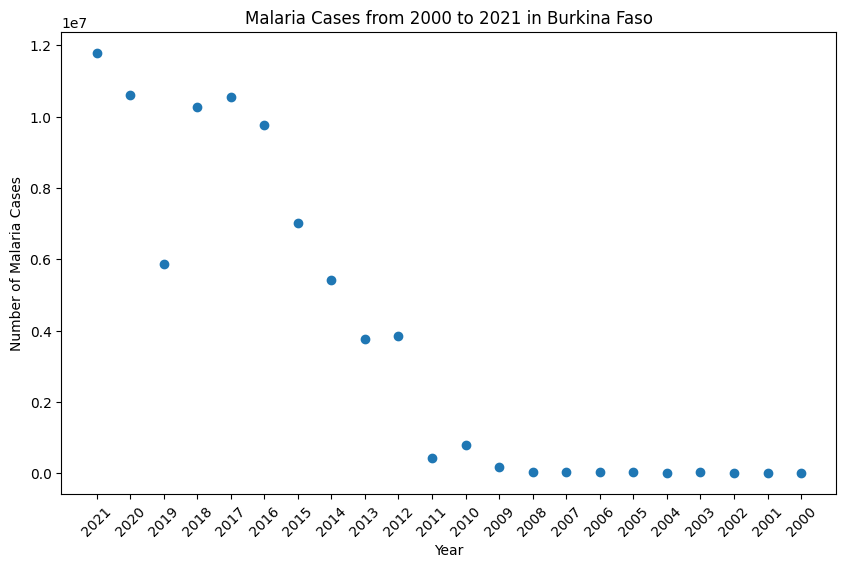

In [28]:
# Extracting relevant columns for scatterplot
years = burkina_faso_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = burkina_faso_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title('Malaria Cases from 2000 to 2021 in Burkina Faso')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Burkina Faso: The number of Malaria cases remained constant in the first 9 years - from 2000 to 2009. There was a minute decrease between 2010 and 2011. However, the number of cases still increased to nearly 1.2 million a year after

*Cote d'Ivoire*

In [29]:
# Example: Accessing the DataFrame for Cote d'Ivoire
cote_dIvoire_df = country_dataframes[countries[2]]

# Print the first country DataFrame
print(cote_dIvoire_df)

         Country       2021       2020       2019       2018       2017  \
0  Cote d'Ivoire  7295068.0  4980640.0  5935178.0  4766477.0  4034781.0   

        2016       2015       2014       2013  ...    2009    2008  \
0  3754504.0  3375904.0  3712831.0  2524326.0  ...  7388.0  3527.0   

            2007           2006  2005   2004    2003    2002     2001     2000  
0  175885.222222  132178.727273  67.0  293.0  1585.0  7628.0  11936.0  15705.0  

[1 rows x 23 columns]


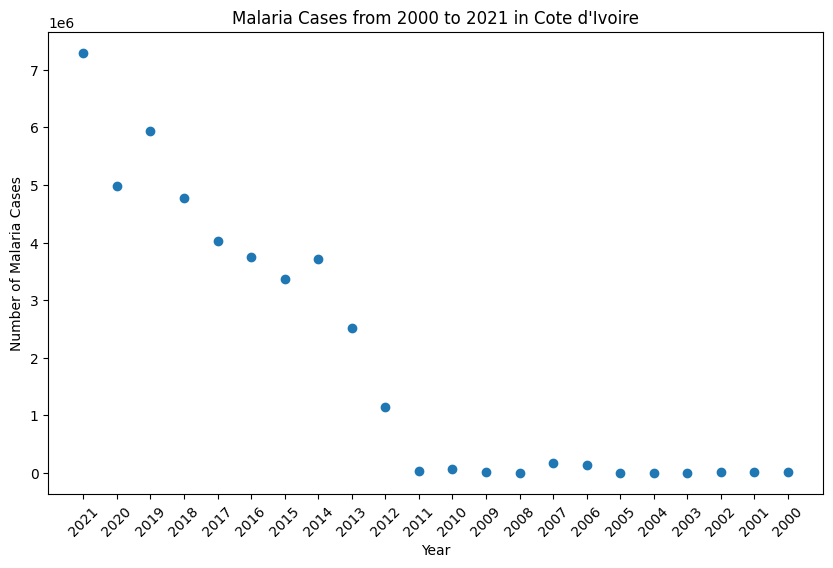

In [30]:
# Extracting relevant columns for scatterplot
years = cote_dIvoire_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = cote_dIvoire_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Cote d'Ivoire")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Cote d'Ivoire: Between 2000 and 2011, there were rarley Malaria cases in Cote d'Ivoire. However,they experienced their fair share of the disease in 2012 with 1 million cases. The number of cases grew to about 3.7 million 3 years later. Even though there was a slight decrease in cases between 2014 and 2015, there has since been a gradual increase in the number of cases. However, there is an anomaly in 2020, where the cases decreased to 5 million. This may be due to the outbreak of Coronoavirus in that year.

*Cabo Verde*

In [31]:
# Example: Accessing the DataFrame for Cabo Verde
cabo_verde_df = country_dataframes[countries[3]]

# Print the first country DataFrame
print(cabo_verde_df)

      Country  2021  2020  2019  2018   2017  2016  2015  2014  2013  ...  \
0  Cabo Verde  21.0  10.0  40.0  21.0  446.0  77.0  27.0  46.0  46.0  ...   

   2009  2008  2007  2006  2005  2004  2003  2002   2001   2000  
0  65.0  35.0  18.0  80.0  68.0  45.0  68.0  76.0  107.0  144.0  

[1 rows x 23 columns]


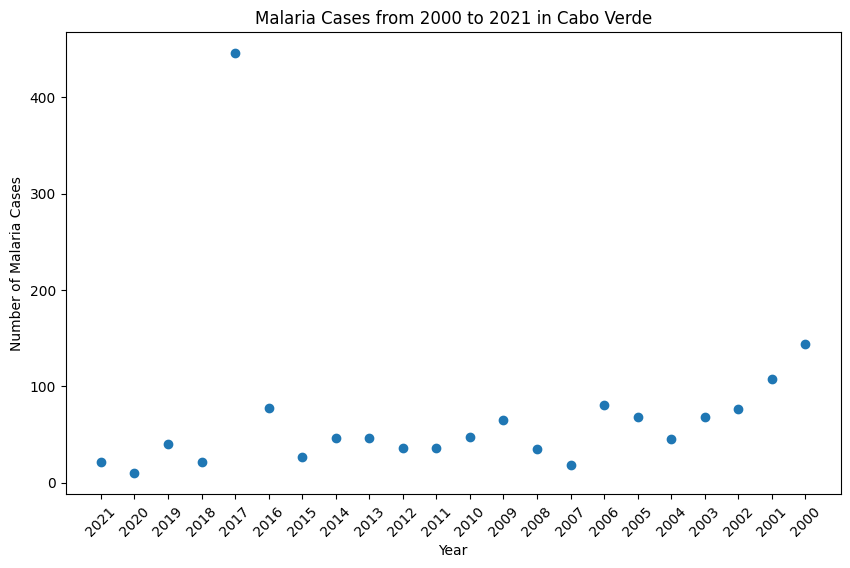

In [32]:
# Extracting relevant columns for scatterplot
years = cabo_verde_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = cabo_verde_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Cabo Verde")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Cabo Verde: Cabo Verde has not experienced their fair share of the Malaria disease. The country has only experienced a maximum number of 200 cases from the year 2000. Even with this, the number of cases have decreased with less than 50 cases in 2021.

*Gambia*

In [33]:
# Example: Accessing the DataFrame for Gambia
gambia_df = country_dataframes[countries[4]]

# Print the first country DataFrame
print(gambia_df)

  Country     2021     2020     2019     2018     2017      2016      2015  \
0  Gambia  77287.0  75801.0  53386.0  87448.0  78040.0  162739.0  246348.0   

       2014      2013  ...     2009     2008           2007           2006  \
0  168256.0  242513.0  ...  50378.0  39164.0  175885.222222  132178.727273   

           2005          2004          2003     2002         2001     2000  
0  83462.909091  79381.666667  29969.142857  10941.5  9566.833333  18138.2  

[1 rows x 23 columns]


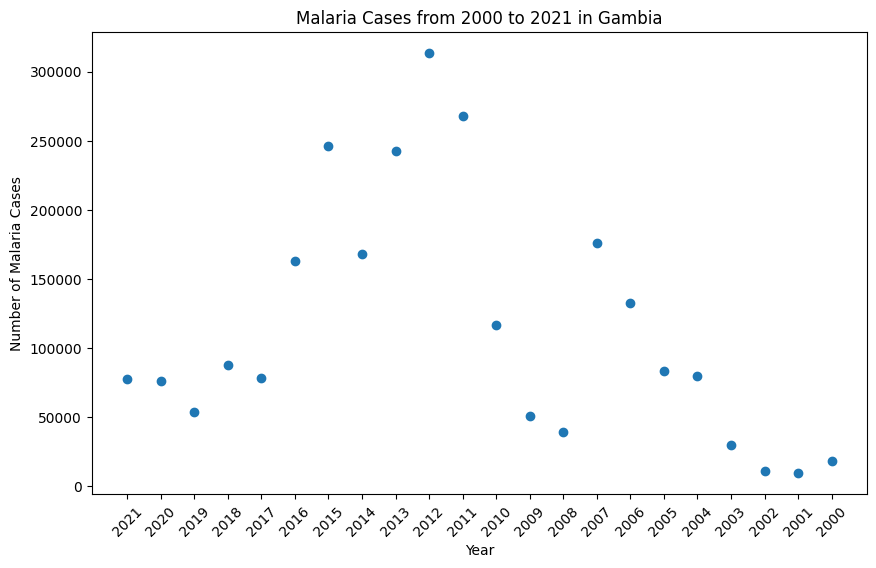

In [34]:
# Extracting relevant columns for scatterplot
years = gambia_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = gambia_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Gambia")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Gambia: The number of Malaria cases in Gambia has been fluctuating from 2000 to 2021.

*Ghana*

In [35]:
# Example: Accessing the DataFrame for Ghana
ghana_df = country_dataframes[countries[5]]

# Print the first country DataFrame
print(ghana_df)

  Country       2021       2020       2019       2018       2017       2016  \
0   Ghana  5747585.0  5172803.0  6115267.0  4931454.0  7003155.0  5428979.0   

        2015       2014       2013  ...       2009       2008      2007  \
0  5657096.0  3415912.0  1643642.0  ...  1104370.0  1094483.0  476484.0   

       2006      2005      2004          2003     2002         2001     2000  
0  472255.0  655093.0  475441.0  29969.142857  10941.5  9566.833333  18138.2  

[1 rows x 23 columns]


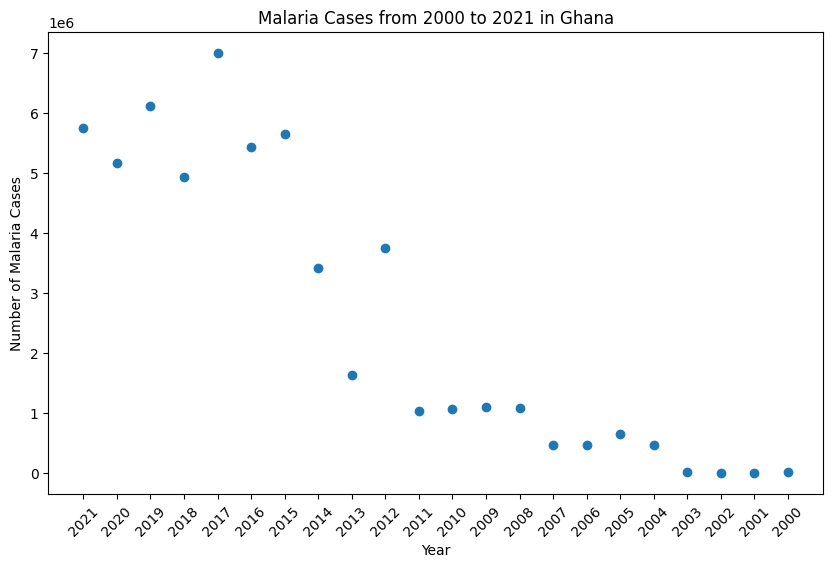

In [36]:
# Extracting relevant columns for scatterplot
years = ghana_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = ghana_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Ghana")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Ghana: There has experienced a gradual increase in Malaria cases from 2000 to 2011. The number of cases remained constant from 2000 to 2003, and also between the period from 2008 to 2012. However, from 2012 to 2021, the number of cases fluctuated throughout the years.

*Guinea*

In [37]:
# Example: Accessing the DataFrame for Guinea
guinea_df = country_dataframes[countries[6]]

# Print the first country DataFrame
print(guinea_df)

  Country       2021       2020       2019       2018       2017      2016  \
0  Guinea  2422374.0  2008976.0  2143225.0  1214996.0  1335323.0  992146.0   

       2015      2014      2013  ...     2009     2008     2007     2006  \
0  810979.0  660207.0  211257.0  ...  35841.0  33405.0  44518.0  54227.0   

      2005      2004      2003     2002    2001    2000  
0  50452.0  103069.0  107925.0  16561.0  6238.0  4800.0  

[1 rows x 23 columns]


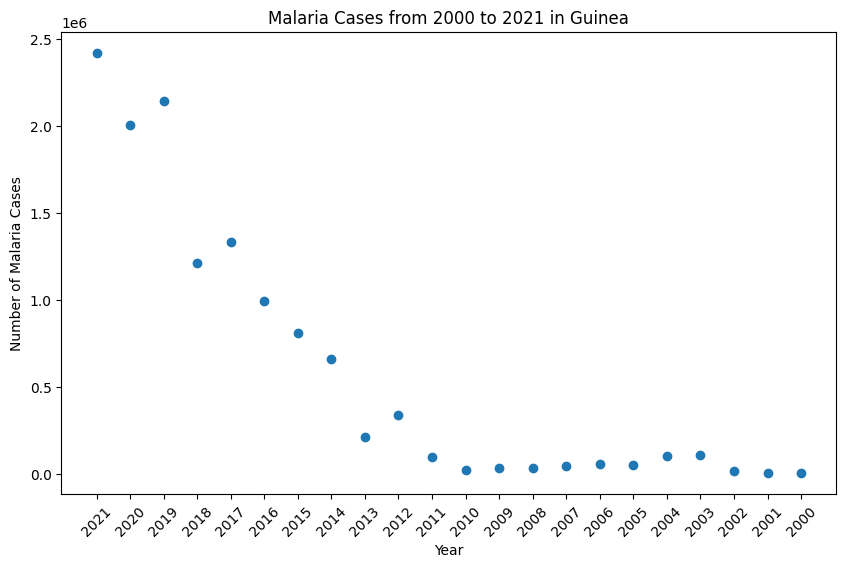

In [38]:
# Extracting relevant columns for scatterplot
years = guinea_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = guinea_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Guinea")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Guinea: There has been a constant number of cases from 2000 to 2010. The number of cases doubled 10 years later to 2.5 million cases in 2020

*Guinea- Bissau*

In [39]:
# Example: Accessing the DataFrame for Guinea-Bissau
guinea_bissau_df = country_dataframes[countries[7]]

# Print the first country DataFrame
print(guinea_bissau_df)

         Country          2021          2020      2019      2018      2017  \
0  Guinea-Bissau  4.213505e+06  3.992863e+06  160907.0  171075.0  152619.0   

       2016      2015     2014     2013  ...     2009     2008     2007  \
0  156471.0  150085.0  97424.0  54584.0  ...  11757.0  11299.0  14284.0   

      2006     2005          2004          2003     2002         2001     2000  
0  15120.0  14659.0  79381.666667  29969.142857  10941.5  9566.833333  18138.2  

[1 rows x 23 columns]


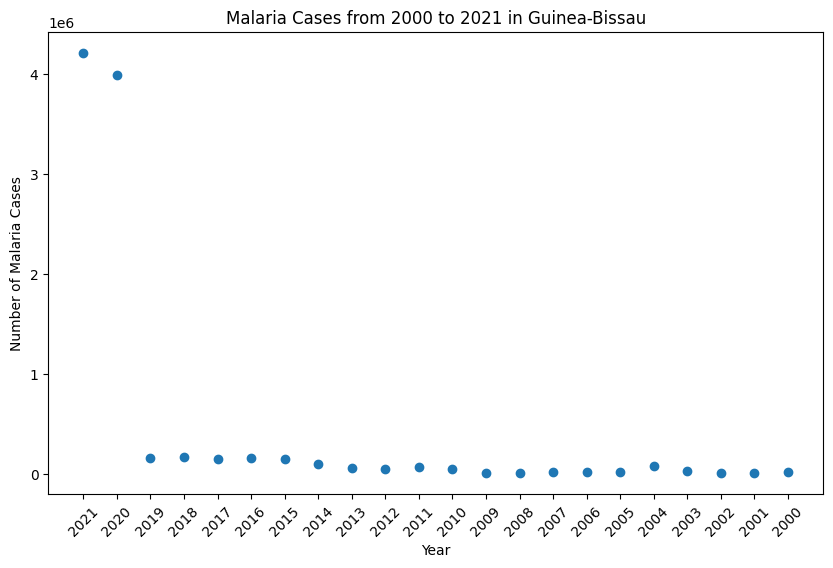

In [40]:
# Extracting relevant columns for scatterplot
years = guinea_bissau_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = guinea_bissau_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Guinea-Bissau")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Guinea- Bissau: In Guinea-Bissau, the number of Malaria cases remained constant throughout the years 2000 and 2021.

*Liberia*

In [41]:
# Example: Accessing the DataFrame for Liberia
liberia_df = country_dataframes[countries[8]]

# Print the first country DataFrame
print(liberia_df)

   Country      2021          2020      2019          2018       2017  \
0  Liberia  912436.0  3.992863e+06  915845.0  3.177631e+06  1093115.0   

        2016      2015      2014       2013  ...      2009      2008  \
0  1191137.0  941711.0  881224.0  1244220.0  ...  839581.0  606952.0   

       2007      2006     2005          2004          2003     2002  \
0  492272.0  761415.0  44875.0  79381.666667  29969.142857  10941.5   

          2001     2000  
0  9566.833333  18138.2  

[1 rows x 23 columns]


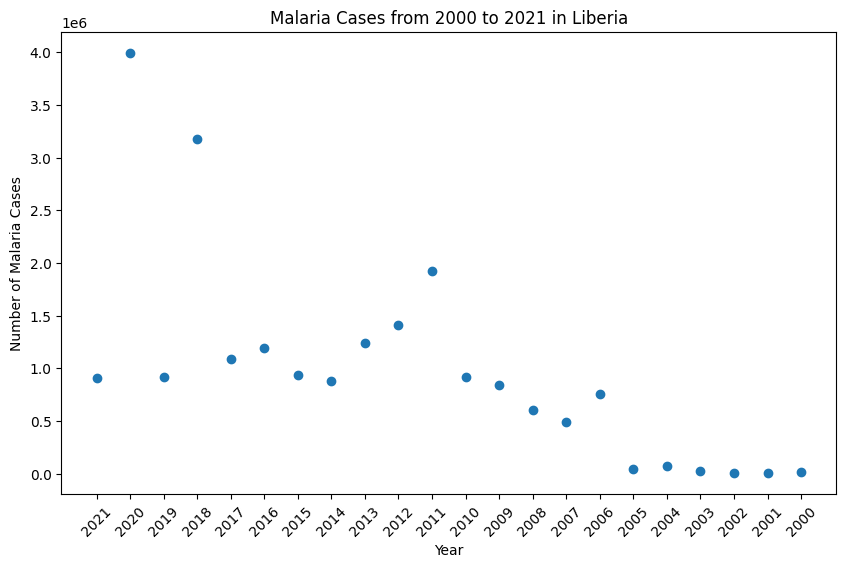

In [42]:
# Extracting relevant columns for scatterplot
years = liberia_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = liberia_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Liberia")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Liberia: The number of cases in Liberia has fluctuated throughout the years 2000 and 2021. There is a noticeable decrease in cases from 2011 to 2014. However, there was a sharp increase in cases from 1.1 million to over 3 million between 2017 and 2018. There was then a striking decrease of cases to below 1 million in 2019, a great increase to approximately 4 million in 2020, and a sharp decrease to over 1 million in 2021.

*Mali*

In [43]:
# Example: Accessing the DataFrame for Mali
mali_df = country_dataframes[countries[9]]

# Print the first country DataFrame
print(mali_df)

  Country       2021       2020       2019       2018       2017       2016  \
0    Mali  3204130.0  2666266.0  3221535.0  2345475.0  2277218.0  2311098.0   

        2015       2014       2013  ...           2009           2008  \
0  2454508.0  2039853.0  1506940.0  ...  359226.333333  246259.714286   

            2007           2006          2005          2004          2003  \
0  175885.222222  132178.727273  83462.909091  79381.666667  29969.142857   

      2002         2001     2000  
0  10941.5  9566.833333  18138.2  

[1 rows x 23 columns]


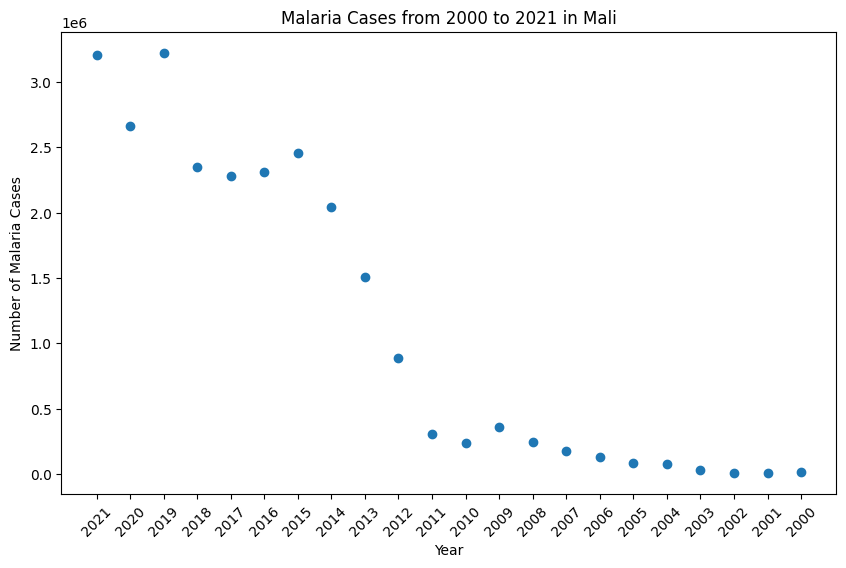

In [44]:
# Extracting relevant columns for scatterplot
years = mali_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = mali_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Mali")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Mali: Mali experienced a sharp increase in Malaria cases from 2011 to 2014. There was a slight decrease from 2015 to 2018. However, cases remained at over 3 million in 2021.

*Mauritania*

In [45]:
# Example: Accessing the DataFrame for Mauritania
mauritania_df = country_dataframes[countries[10]]

# Print the first country DataFrame
print(mauritania_df)

      Country     2021     2020     2019     2018     2017     2016     2015  \
0  Mauritania  18660.0  12425.0  14869.0  30609.0  20105.0  29156.0  22631.0   

      2014    2013  ...   2009   2008           2007    2006          2005  \
0  15835.0  1587.0  ...  940.0  302.0  175885.222222  1061.0  83462.909091   

           2004          2003     2002         2001     2000  
0  79381.666667  29969.142857  10941.5  9566.833333  18138.2  

[1 rows x 23 columns]


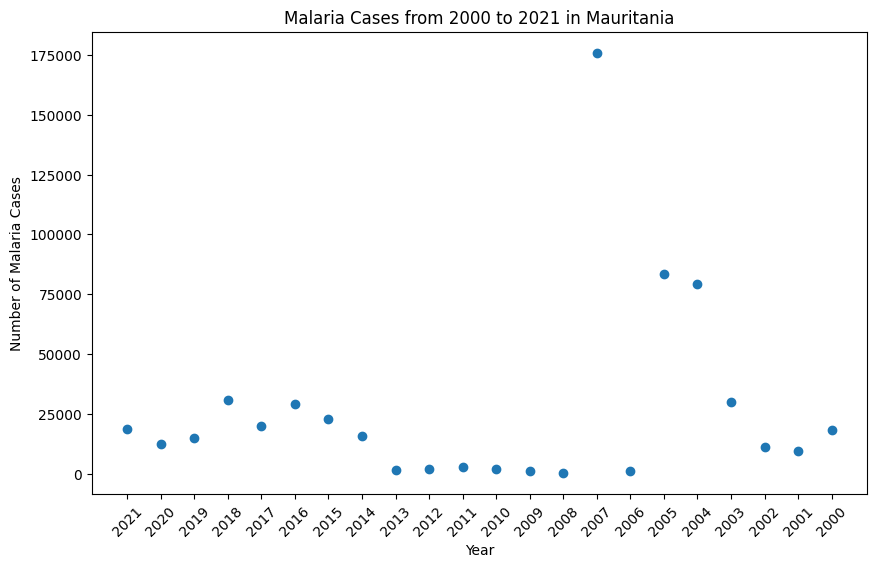

In [46]:
# Extracting relevant columns for scatterplot
years = mauritania_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = mauritania_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Mauritania")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Mauritania: Compared to other West African countries, Mauritania has a relatively lower number of Malaria cases. Its highest number of cases was reportedly approximately 75000.

*Niger*

In [47]:
# Example: Accessing the DataFrame for Niger
niger_df = country_dataframes[countries[11]]

# Print the first country DataFrame
print(niger_df)

  Country       2021       2020       2019       2018       2017       2016  \
0   Niger  4044707.0  4377938.0  3771451.0  3046450.0  2761268.0  4258110.0   

        2015       2014       2013  ...      2009      2008      2007  \
0  2392108.0  3963768.0  2373591.0  ...  309675.0  682685.0  268164.0   

      2006     2005     2004     2003     2002         2001     2000  
0  48568.0  84002.0  76030.0  56460.0  10941.5  9566.833333  18138.2  

[1 rows x 23 columns]


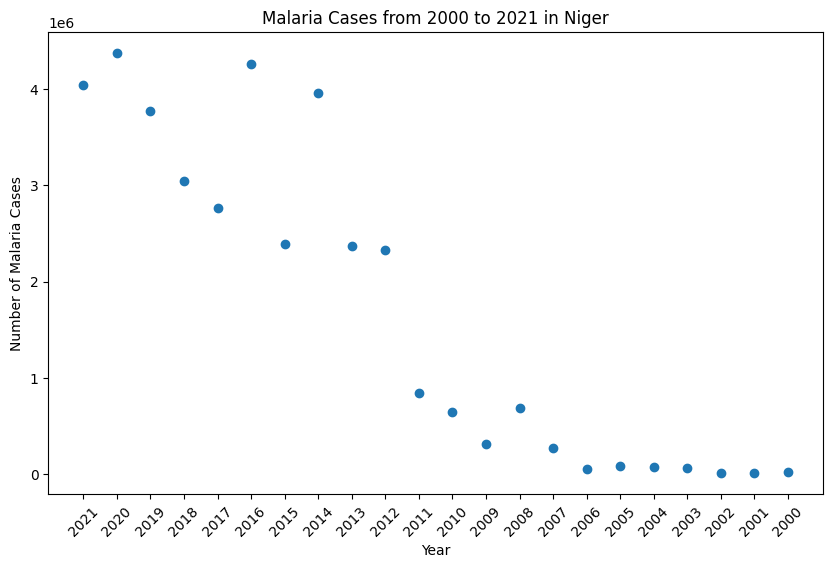

In [48]:
# Extracting relevant columns for scatterplot
years = niger_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = niger_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Niger")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Niger: There has been a general increase in Malaria cases in Niger from 2007 to 2021.

*Nigeria*

In [49]:
# Example: Accessing the DataFrame for Nigeria
nigeria_df = country_dataframes[countries[12]]

# Print the first country DataFrame
print(nigeria_df)

   Country        2021        2020        2019        2018        2017  \
0  Nigeria  21325186.0  18325240.0  19806915.0  14548024.0  13087878.0   

         2016       2015       2014          2013  ...      2009      2008  \
0  13598282.0  8068583.0  8572322.0  1.179789e+06  ...  479845.0  143079.0   

            2007           2006          2005          2004          2003  \
0  175885.222222  132178.727273  83462.909091  79381.666667  29969.142857   

      2002         2001     2000  
0  10941.5  9566.833333  18138.2  

[1 rows x 23 columns]


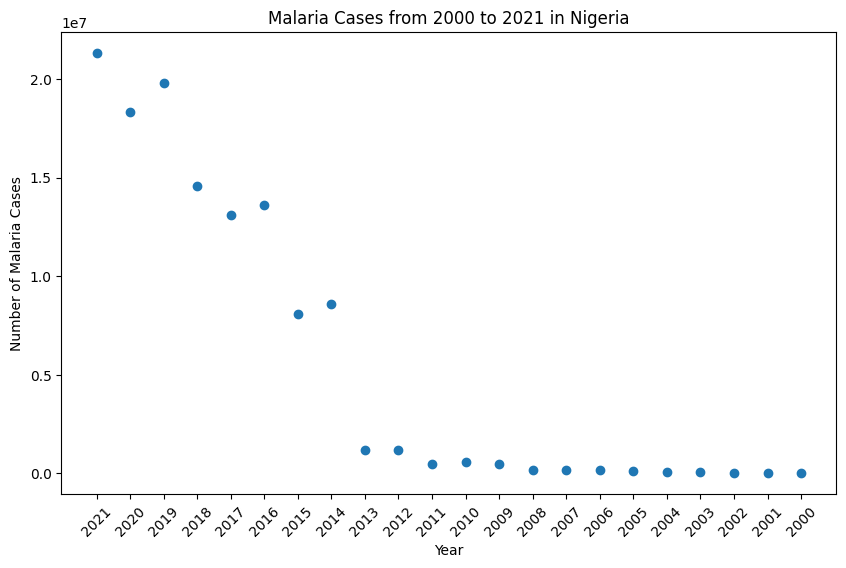

In [50]:
# Extracting relevant columns for scatterplot
years = nigeria_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = nigeria_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Nigeria")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Nigeria: Nigeria remians the country with the highest number of Malaria cases of 2.5 billion.

*Senegal*

In [51]:
# Example: Accessing the DataFrame for Senegal
senegal_df = country_dataframes[countries[13]]

# Print the first country DataFrame
print(senegal_df)

   Country      2021      2020      2019      2018      2017      2016  \
0  Senegal  536850.0  445313.0  354708.0  530944.0  395706.0  349540.0   

       2015      2014      2013  ...      2009      2008     2007     2006  \
0  492253.0  265624.0  366687.0  ...  174890.0  217096.0  23163.0  21911.0   

      2005     2004     2003    2002    2001     2000  
0  14132.0  11628.0  13722.0  8911.0  7535.0  44959.0  

[1 rows x 23 columns]


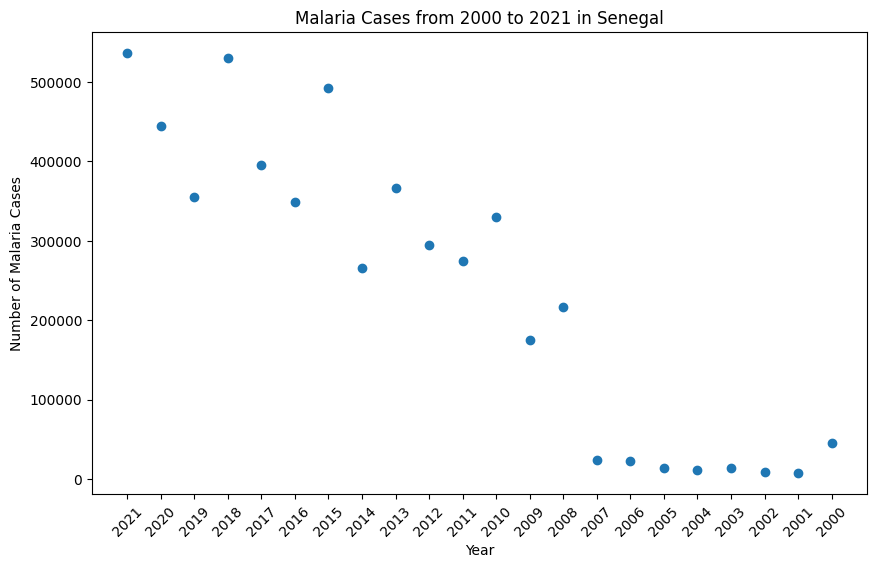

In [52]:
# Extracting relevant columns for scatterplot
years = senegal_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = senegal_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Senegal")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Senegal: The number of Malaria outbreaks fluctuate throughut the years, especially from 2008 to 2021. However, these numbers are relatively low, compared to the other West Africam countries, with all being below 1 million.

*Sierra Leone*

In [53]:
# Example: Accessing the DataFrame for Sierra Leone
sierra_leone_df = country_dataframes[countries[14]]

# Print the first country DataFrame
print(sierra_leone_df)

        Country       2021      2020       2019       2018       2017  \
0  Sierra Leone  1953902.0  725006.0  2407505.0  1733831.0  1651236.0   

        2016       2015       2014       2013  ...      2009      2008  \
0  1775306.0  1483376.0  1374476.0  1701958.0  ...  646808.0  176356.0   

            2007    2006    2005    2004    2003    2002    2001     2000  
0  175885.222222  4932.0  4808.0  2206.0  3945.0  3702.0  2206.0  18138.2  

[1 rows x 23 columns]


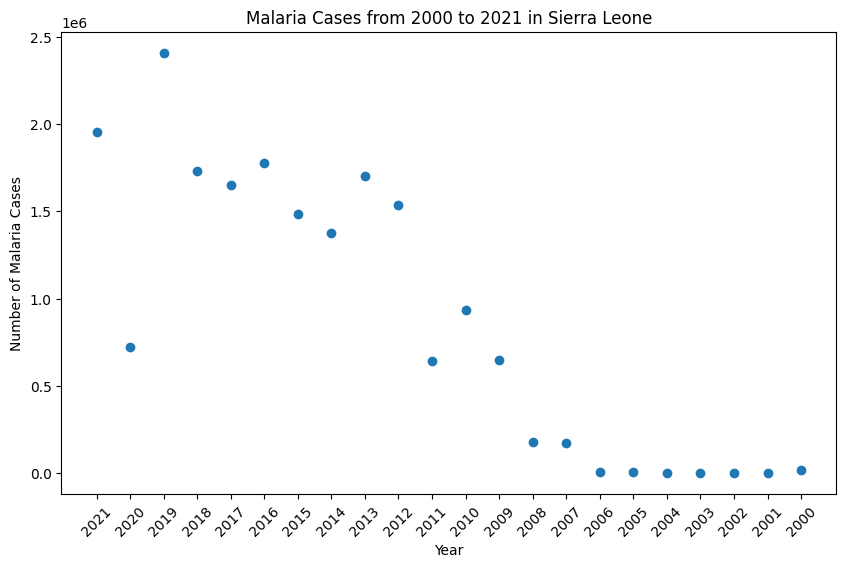

In [54]:
# Extracting relevant columns for scatterplot
years = sierra_leone_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = sierra_leone_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Sierra Leone")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Sierra Leone: It is evident that the number of Malara outbreaks in Sierra Leone frequently fluctuate from 2009 to 2021.

*Togo*

In [55]:
# Example: Accessing the DataFrame for Togo
togo_df = country_dataframes[countries[15]]

# Print the first country DataFrame
print(togo_df)

  Country      2021          2020       2019       2018       2017       2016  \
0    Togo  996364.0  3.992863e+06  2406091.0  2002877.0  1756582.0  1746334.0   

        2015       2014      2013  ...      2009      2008      2007     2006  \
0  1610711.0  1524339.0  965832.0  ...  654733.0  402739.0  219818.0  30132.0   

      2005     2004     2003     2002     2001     2000  
0  28601.0  27467.0  26079.0  28771.0  29379.0  25083.0  

[1 rows x 23 columns]


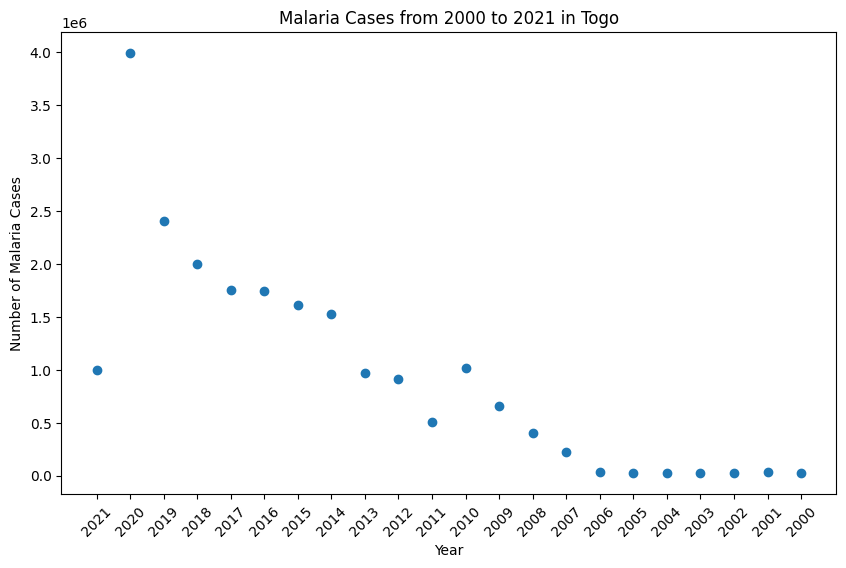

In [56]:
# Extracting relevant columns for scatterplot
years = togo_df.columns[1:]  # Assuming columns from index 1 onward are years
malaria_cases = togo_df.iloc[0, 1:]  # Assuming the first row contains malaria cases data

# Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, malaria_cases)

plt.xlabel('Year')
plt.ylabel('Number of Malaria Cases')
plt.title("Malaria Cases from 2000 to 2021 in Togo")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Conclusion about Togo: There has been a general increase in Malaria cases in the first 20 years. Between 2018 and 2020, cases nearly doubled from 2 million cases to approximately 4 million cases. Fortunately, there was a drop in the number of cases to 1 million in 2021

*Changing the structure of the 16 dataframes AND scaling each of them*

In [57]:
# Benin
# Melt the DataFrame to convert it from wide to long format
benin_melted_df = pd.melt(benin_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
benin_melted_df = benin_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = benin_melted_df.index[-1]

# Drop the last row
benin_melted_df = benin_melted_df.drop(last_row_index)

# Reset index
benin_melted_df = benin_melted_df.reset_index(drop=True)

In [58]:
benin_melted_df

,Year,Number of Malaria Cases
0,2000,18138.2
1,2001,9566.833333
2,2002,10941.5
3,2003,29969.142857
4,2004,79381.666667
5,2005,83462.909091
6,2006,132178.727273
7,2007,175885.222222
8,2008,246259.714286
9,2009,889597.0


In [59]:
# Find the maximum and minimum values
max_malaria_cases = benin_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = benin_melted_df['Number of Malaria Cases'].min()

print(f"Maximum number of malaria cases: {max_malaria_cases}")
print(f"Minimum number of malaria cases: {min_malaria_cases}")

Maximum number of malaria cases: 2895878.0
Minimum number of malaria cases: 9566.833333333334


In [60]:
# Initialize the MinMaxScaler
benin_scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = benin_scaler.fit_transform(benin_melted_df)

# Create a new DataFrame with the scaled values
benin_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

benin_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.002970
1,0.047619,0.000000
2,0.095238,0.000476
3,0.142857,0.007069
4,0.190476,0.024188
5,0.238095,0.025602
6,0.285714,0.042480
7,0.333333,0.057623
8,0.380952,0.082005
9,0.428571,0.304898


In [61]:
# Burkina Faso
# Melt the DataFrame to convert it from wide to long format
burkina_faso_melted_df = pd.melt(burkina_faso_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
burkina_faso_melted_df = burkina_faso_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = burkina_faso_melted_df.index[-1]

# Drop the last row
burkina_faso_melted_df = burkina_faso_melted_df.drop(last_row_index)

# Reset index
burkina_faso_melted_df = burkina_faso_melted_df.reset_index(drop=True)

In [62]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(burkina_faso_melted_df)

# Create a new DataFrame with the scaled values
burkina_faso_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [63]:
burkina_faso_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.000727
1,0.047619,0.000000
2,0.095238,0.000117
3,0.142857,0.001732
4,0.190476,0.000737
5,0.238095,0.000999
6,0.285714,0.002945
7,0.333333,0.002943
8,0.380952,0.002287
9,0.428571,0.014680


In [64]:
# Cote d'Ivoire
# Melt the DataFrame to convert it from wide to long format
cote_dIvoire_melted_df = pd.melt(cote_dIvoire_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
cote_dIvoire_melted_df = cote_dIvoire_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = cote_dIvoire_melted_df.index[-1]

# Drop the last row
cote_dIvoire_melted_df = cote_dIvoire_melted_df.drop(last_row_index)

# Reset index
cote_dIvoire_melted_df = cote_dIvoire_melted_df.reset_index(drop=True)

In [65]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(cote_dIvoire_melted_df)

# Create a new DataFrame with the scaled values
cote_dIvoire_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [66]:
cote_dIvoire_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.002144
1,0.047619,0.001627
2,0.095238,0.001036
3,0.142857,0.000208
4,0.190476,0.000031
5,0.238095,0.000000
6,0.285714,0.018110
7,0.333333,0.024101
8,0.380952,0.000474
9,0.428571,0.001004


In [67]:
# Cabo Verde
# Melt the DataFrame to convert it from wide to long format
cabo_verde_melted_df = pd.melt(cabo_verde_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
cabo_verde_melted_df = cabo_verde_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = cabo_verde_melted_df.index[-1]

# Drop the last row
cabo_verde_melted_df = cabo_verde_melted_df.drop(last_row_index)

# Reset index
cabo_verde_melted_df = cabo_verde_melted_df.reset_index(drop=True)

In [68]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(cabo_verde_melted_df)

# Create a new DataFrame with the scaled values
cabo_verde_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [69]:
cabo_verde_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.307339
1,0.047619,0.222477
2,0.095238,0.151376
3,0.142857,0.133028
4,0.190476,0.080275
5,0.238095,0.133028
6,0.285714,0.160550
7,0.333333,0.018349
8,0.380952,0.057339
9,0.428571,0.126147


In [70]:
# Gambia
# Melt the DataFrame to convert it from wide to long format
gambia_melted_df = pd.melt(gambia_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
gambia_melted_df = gambia_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = gambia_melted_df.index[-1]

# Drop the last row
gambia_melted_df = gambia_melted_df.drop(last_row_index)

# Reset index
gambia_melted_df = gambia_melted_df.reset_index(drop=True)

In [71]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(gambia_melted_df)

# Create a new DataFrame with the scaled values
gambia_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [72]:
gambia_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.028204
1,0.047619,0.000000
2,0.095238,0.004523
3,0.142857,0.067134
4,0.190476,0.229728
5,0.238095,0.243157
6,0.285714,0.403458
7,0.333333,0.547276
8,0.380952,0.097390
9,0.428571,0.134290


In [73]:
# Ghana
# Melt the DataFrame to convert it from wide to long format
ghana_melted_df = pd.melt(ghana_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
ghana_melted_df = ghana_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = ghana_melted_df.index[-1]

# Drop the last row
ghana_melted_df = ghana_melted_df.drop(last_row_index)

# Reset index
ghana_melted_df = ghana_melted_df.reset_index(drop=True)

In [74]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(ghana_melted_df)

# Create a new DataFrame with the scaled values
ghana_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [75]:
ghana_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.001226
1,0.047619,0.000000
2,0.095238,0.000197
3,0.142857,0.002917
4,0.190476,0.066614
5,0.238095,0.092303
6,0.285714,0.066159
7,0.333333,0.066764
8,0.380952,0.155130
9,0.428571,0.156544


In [76]:
# Guinea
# Melt the DataFrame to convert it from wide to long format
guinea_melted_df = pd.melt(guinea_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
guinea_melted_df = guinea_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = guinea_melted_df.index[-1]

# Drop the last row
guinea_melted_df = guinea_melted_df.drop(last_row_index)

# Reset index
guinea_melted_df = guinea_melted_df.reset_index(drop=True)

In [77]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(guinea_melted_df)

# Create a new DataFrame with the scaled values
guinea_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [78]:
guinea_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.000000
1,0.047619,0.000595
2,0.095238,0.004865
3,0.142857,0.042656
4,0.190476,0.040648
5,0.238095,0.018883
6,0.285714,0.020445
7,0.333333,0.016429
8,0.380952,0.011832
9,0.428571,0.012840


In [79]:
# Guinea-Bissau
# Melt the DataFrame to convert it from wide to long format
guinea_bissau_melted_df = pd.melt(guinea_bissau_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
guinea_bissau_melted_df = guinea_bissau_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = guinea_bissau_melted_df.index[-1]

# Drop the last row
guinea_bissau_melted_df = guinea_bissau_melted_df.drop(last_row_index)

# Reset index
guinea_bissau_melted_df = guinea_bissau_melted_df.reset_index(drop=True)

In [80]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(guinea_bissau_melted_df)

# Create a new DataFrame with the scaled values
guinea_bissau_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [81]:
guinea_bissau_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.002039
1,0.047619,0.000000
2,0.095238,0.000327
3,0.142857,0.004853
4,0.190476,0.016607
5,0.238095,0.001211
6,0.285714,0.001321
7,0.333333,0.001122
8,0.380952,0.000412
9,0.428571,0.000521


In [82]:
# Liberia
# Melt the DataFrame to convert it from wide to long format
liberia_melted_df = pd.melt(liberia_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
liberia_melted_df = liberia_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = liberia_melted_df.index[-1]

# Drop the last row
liberia_melted_df = liberia_melted_df.drop(last_row_index)

# Reset index
liberia_melted_df = liberia_melted_df.reset_index(drop=True)

In [83]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(liberia_melted_df)

# Create a new DataFrame with the scaled values
liberia_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [84]:
liberia_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.002152
1,0.047619,0.000000
2,0.095238,0.000345
3,0.142857,0.005122
4,0.190476,0.017527
5,0.238095,0.008864
6,0.285714,0.188750
7,0.333333,0.121182
8,0.380952,0.149973
9,0.428571,0.208374


In [85]:
# Mali
# Melt the DataFrame to convert it from wide to long format
mali_melted_df = pd.melt(mali_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
mali_melted_df = mali_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = mali_melted_df.index[-1]

# Drop the last row
mali_melted_df = mali_melted_df.drop(last_row_index)

# Reset index
mali_melted_df = mali_melted_df.reset_index(drop=True)

In [86]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(mali_melted_df)

# Create a new DataFrame with the scaled values
mali_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [87]:
mali_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.002669
1,0.047619,0.000000
2,0.095238,0.000428
3,0.142857,0.006352
4,0.190476,0.021736
5,0.238095,0.023006
6,0.285714,0.038173
7,0.333333,0.051781
8,0.380952,0.073691
9,0.428571,0.108861


In [88]:
# Mauritania
# Melt the DataFrame to convert it from wide to long format
mauritania_melted_df = pd.melt(mauritania_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
mauritania_melted_df = mauritania_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = mauritania_melted_df.index[-1]

# Drop the last row
mauritania_melted_df = mauritania_melted_df.drop(last_row_index)

# Reset index
mauritania_melted_df = mauritania_melted_df.reset_index(drop=True)

In [89]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(mauritania_melted_df)

# Create a new DataFrame with the scaled values
mauritania_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [90]:
mauritania_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.101583
1,0.047619,0.052766
2,0.095238,0.060595
3,0.142857,0.168963
4,0.190476,0.450383
5,0.238095,0.473627
6,0.285714,0.004323
7,0.333333,1.000000
8,0.380952,0.000000
9,0.428571,0.003634


In [91]:
# Niger
# Melt the DataFrame to convert it from wide to long format
niger_melted_df = pd.melt(niger_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
niger_melted_df = niger_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = niger_melted_df.index[-1]

# Drop the last row
niger_melted_df = niger_melted_df.drop(last_row_index)

# Reset index
niger_melted_df = niger_melted_df.reset_index(drop=True)

In [92]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(niger_melted_df)

# Create a new DataFrame with the scaled values
niger_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [93]:
niger_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.001962
1,0.047619,0.000000
2,0.095238,0.000315
3,0.142857,0.010735
4,0.190476,0.015215
5,0.238095,0.017040
6,0.285714,0.008928
7,0.333333,0.059198
8,0.380952,0.154089
9,0.428571,0.068700


In [94]:
# Nigeria
# Melt the DataFrame to convert it from wide to long format
nigeria_melted_df = pd.melt(nigeria_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
nigeria_melted_df = nigeria_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = nigeria_melted_df.index[-1]

# Drop the last row
nigeria_melted_df = nigeria_melted_df.drop(last_row_index)

# Reset index
nigeria_melted_df = nigeria_melted_df.reset_index(drop=True)

In [95]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(nigeria_melted_df)

# Create a new DataFrame with the scaled values
nigeria_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [96]:
nigeria_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.000402
1,0.047619,0.000000
2,0.095238,0.000064
3,0.142857,0.000957
4,0.190476,0.003275
5,0.238095,0.003467
6,0.285714,0.005752
7,0.333333,0.007803
8,0.380952,0.006264
9,0.428571,0.022063


In [97]:
# Senegal
# Melt the DataFrame to convert it from wide to long format
senegal_melted_df = pd.melt(senegal_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
senegal_melted_df = senegal_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = senegal_melted_df.index[-1]

# Drop the last row
senegal_melted_df = senegal_melted_df.drop(last_row_index)

# Reset index
senegal_melted_df = senegal_melted_df.reset_index(drop=True)

In [98]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(senegal_melted_df)

# Create a new DataFrame with the scaled values
senegal_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [99]:
senegal_melted_df

,Year,Number of Malaria Cases
0,2000,44959.0
1,2001,7535.0
2,2002,8911.0
3,2003,13722.0
4,2004,11628.0
5,2005,14132.0
6,2006,21911.0
7,2007,23163.0
8,2008,217096.0
9,2009,174890.0


In [100]:
# Sierra Leone
# Melt the DataFrame to convert it from wide to long format
sierra_leone_melted_df = pd.melt(sierra_leone_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
sierra_leone_melted_df = sierra_leone_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = sierra_leone_melted_df.index[-1]

# Drop the last row
sierra_leone_melted_df = sierra_leone_melted_df.drop(last_row_index)

# Reset index
sierra_leone_melted_df = sierra_leone_melted_df.reset_index(drop=True)

In [101]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(sierra_leone_melted_df)

# Create a new DataFrame with the scaled values
sierra_leone_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [102]:
sierra_leone_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.006624
1,0.047619,0.000000
2,0.095238,0.000622
3,0.142857,0.000723
4,0.190476,0.000000
5,0.238095,0.001082
6,0.285714,0.001133
7,0.333333,0.072207
8,0.380952,0.072403
9,0.428571,0.267992


In [103]:
# Togo
numerical_columns = togo_df.columns[1:]  # Assuming columns from index 1 onward are numerical

# Melt the DataFrame to convert it from wide to long format
togo_melted_df = pd.melt(togo_df, var_name='Year', value_name='Number of Malaria Cases')

# Sort the DataFrame by 'Year'
togo_melted_df = togo_melted_df.sort_values(by='Year')

# Get the index of the last row
last_row_index = togo_melted_df.index[-1]

# Drop the last row
togo_melted_df = togo_melted_df.drop(last_row_index)

# Reset index
togo_melted_df = togo_melted_df.reset_index(drop=True)

In [104]:
#Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_data = scaler.fit_transform(togo_melted_df)

# Create a new DataFrame with the scaled values
togo_scaled_df = pd.DataFrame(scaled_data, columns=['Year', 'Scaled Number of Malaria Cases'])

In [105]:
togo_scaled_df

,Year,Scaled Number of Malaria Cases
0,0.000000,0.000000
1,0.047619,0.001083
2,0.095238,0.000929
3,0.142857,0.000251
4,0.190476,0.000601
5,0.238095,0.000887
6,0.285714,0.001272
7,0.333333,0.049079
8,0.380952,0.095181
9,0.428571,0.158691


***Feature Engineering***

In [106]:
# Benin
# Extract the target variable 'y'
y = benin_scaled_df['Scaled Number of Malaria Cases'].values
#y = np.asarray(y).astype(np.float32)


# Extract the features (assuming you have only one feature 'Year')
x = benin_scaled_df['Year'].values
#x = np.asarray(x).astype(np.float32)


# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%


x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training of models, evaluation and optimisation***

In [107]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):
    # Assuming you have x_train, y_train, x_val, y_val, x_test, and y_test defined globally or passed as arguments

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [108]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

Epoch 1/36
1/1 [==============================] - 5s 5s/step - loss: 0.1277 - val_loss: 0.1241
Epoch 2/36
1/1 [==============================] - 0s 69ms/step - loss: 0.1277 - val_loss: 0.1241
Epoch 3/36
1/1 [==============================] - 0s 69ms/step - loss: 0.1277 - val_loss: 0.1241
Epoch 4/36
1/1 [==============================] - 0s 126ms/step - loss: 0.1276 - val_loss: 0.1240
Epoch 5/36
1/1 [==============================] - 0s 101ms/step - loss: 0.1276 - val_loss: 0.1240
Epoch 6/36
1/1 [==============================] - 0s 102ms/step - loss: 0.1276 - val_loss: 0.1239
Epoch 7/36
1/1 [==============================] - 0s 101ms/step - loss: 0.1276 - val_loss: 0.1239
Epoch 8/36
1/1 [==============================] - 0s 88ms/step - loss: 0.1275 - val_loss: 0.1238
Epoch 9/36
1/1 [==============================] - 0s 76ms/step - loss: 0.1275 - val_loss: 0.1238
Epoch 10/36
1/1 [==============================] - 0s 71ms/step - loss: 0.1275 - val_loss: 0.1237
Epoch 11/36
1/1 [==========

In [109]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/

Best Parameters:  {'batch_size': 16, 'epochs': 20, 'optimizer': 'adam'}


In [110]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_benin = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_benin.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_benin.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

1/1 [==============================] - 0s 278ms/step
Mean Squared Error: 0.1211


***Predicting the number of malaria cases from 2022 to 2032***

1/1 [==============================] - 0s 194ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


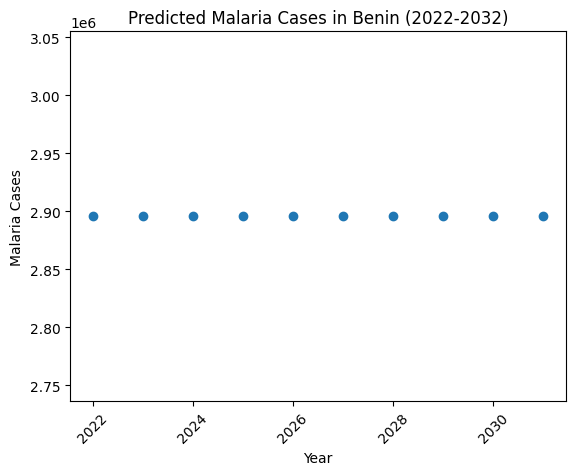

In [111]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = benin_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = benin_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_benin.predict(input_data)
print(predictions)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Benin (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [112]:
# Burkina Faso
# Extract the target variable 'y'
y = burkina_faso_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = burkina_faso_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [113]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [114]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))

lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

Epoch 1/36
1/1 [==============================] - 2s 2s/step - loss: 0.1616 - val_loss: 0.1652
Epoch 2/36
1/1 [==============================] - 0s 73ms/step - loss: 0.1616 - val_loss: 0.1651
Epoch 3/36
1/1 [==============================] - 0s 68ms/step - loss: 0.1616 - val_loss: 0.1651
Epoch 4/36
1/1 [==============================] - 0s 67ms/step - loss: 0.1616 - val_loss: 0.1650
Epoch 5/36
1/1 [==============================] - 0s 82ms/step - loss: 0.1615 - val_loss: 0.1649
Epoch 6/36
1/1 [==============================] - 0s 78ms/step - loss: 0.1615 - val_loss: 0.1649
Epoch 7/36
1/1 [==============================] - 0s 108ms/step - loss: 0.1615 - val_loss: 0.1648
Epoch 8/36
1/1 [==============================] - 0s 102ms/step - loss: 0.1615 - val_loss: 0.1648
Epoch 9/36
1/1 [==============================] - 0s 96ms/step - loss: 0.1614 - val_loss: 0.1647
Epoch 10/36
1/1 [==============================] - 0s 79ms/step - loss: 0.1614 - val_loss: 0.1647
Epoch 11/36
1/1 [============

In [115]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/

Best Parameters:  {'batch_size': 16, 'epochs': 20, 'optimizer': 'adam'}


In [122]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_burkina_faso = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_burkina_faso.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_burkina_faso.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

1/1 [==============================] - 0s 203ms/step
Mean Squared Error: 0.1593


***Predicting the number of malaria cases from 2022 to 2032***

1/1 [==============================] - 0s 293ms/step


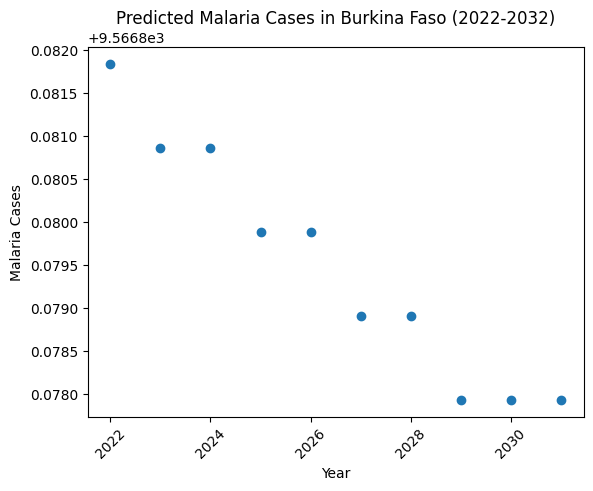

In [123]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = burkina_faso_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = burkina_faso_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_burkina_faso.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Burkina Faso (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [124]:
# Cote d'Ivoire
# Extract the target variable 'y'
y = cote_dIvoire_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = cote_dIvoire_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [119]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [120]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

Epoch 1/36
1/1 [==============================] - 2s 2s/step - loss: 0.1493 - val_loss: 0.1721
Epoch 2/36
1/1 [==============================] - 0s 41ms/step - loss: 0.1493 - val_loss: 0.1720
Epoch 3/36
1/1 [==============================] - 0s 45ms/step - loss: 0.1492 - val_loss: 0.1719
Epoch 4/36
1/1 [==============================] - 0s 46ms/step - loss: 0.1492 - val_loss: 0.1718
Epoch 5/36
1/1 [==============================] - 0s 44ms/step - loss: 0.1491 - val_loss: 0.1718
Epoch 6/36
1/1 [==============================] - 0s 45ms/step - loss: 0.1491 - val_loss: 0.1717
Epoch 7/36
1/1 [==============================] - 0s 49ms/step - loss: 0.1491 - val_loss: 0.1716
Epoch 8/36
1/1 [==============================] - 0s 48ms/step - loss: 0.1490 - val_loss: 0.1715
Epoch 9/36
1/1 [==============================] - 0s 47ms/step - loss: 0.1490 - val_loss: 0.1714
Epoch 10/36
1/1 [==============================] - 0s 48ms/step - loss: 0.1490 - val_loss: 0.1713
Epoch 11/36
1/1 [==============

In [121]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/

Best Parameters:  {'batch_size': 16, 'epochs': 20, 'optimizer': 'adam'}


In [127]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_cote_dIvoire = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_cote_dIvoire.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_cote_dIvoire.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

1/1 [==============================] - 0s 205ms/step
Mean Squared Error: 0.1672


***Predicting the number of malaria cases from 2022 to 2032***

1/1 [==============================] - 0s 30ms/step
[[7295068.]
 [7295068.]
 [7295068.]
 [7295068.]
 [7295068.]
 [7295068.]
 [7295068.]
 [7295068.]
 [7295068.]
 [7295068.]]


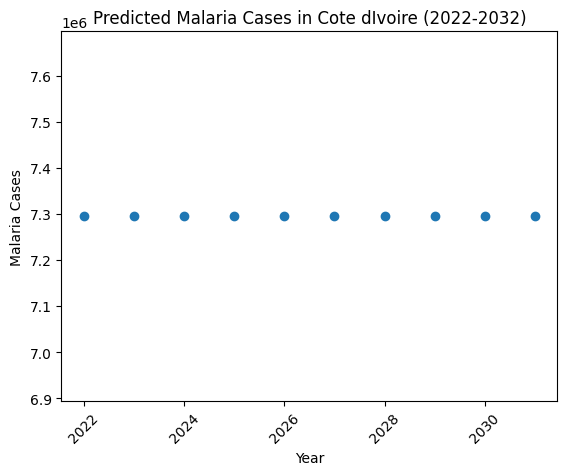

In [129]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = cote_dIvoire_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = cote_dIvoire_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_cote_dIvoire.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)
print(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Cote dIvoire (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


***Feature Engineering***

In [130]:
# Cabo Verde
# Extract the target variable 'y'
y = cabo_verde_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = cabo_verde_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [131]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [132]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

Epoch 1/36
1/1 [==============================] - 2s 2s/step - loss: 0.1826 - val_loss: 0.1709
Epoch 2/36
1/1 [==============================] - 0s 42ms/step - loss: 0.1825 - val_loss: 0.1708
Epoch 3/36
1/1 [==============================] - 0s 40ms/step - loss: 0.1825 - val_loss: 0.1707
Epoch 4/36
1/1 [==============================] - 0s 45ms/step - loss: 0.1824 - val_loss: 0.1706
Epoch 5/36
1/1 [==============================] - 0s 40ms/step - loss: 0.1823 - val_loss: 0.1705
Epoch 6/36
1/1 [==============================] - 0s 52ms/step - loss: 0.1823 - val_loss: 0.1704
Epoch 7/36
1/1 [==============================] - 0s 41ms/step - loss: 0.1822 - val_loss: 0.1704
Epoch 8/36
1/1 [==============================] - 0s 45ms/step - loss: 0.1821 - val_loss: 0.1703
Epoch 9/36
1/1 [==============================] - 0s 38ms/step - loss: 0.1820 - val_loss: 0.1702
Epoch 10/36
1/1 [==============================] - 0s 41ms/step - loss: 0.1820 - val_loss: 0.1701
Epoch 11/36
1/1 [==============

In [133]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/

Best Parameters:  {'batch_size': 16, 'epochs': 20, 'optimizer': 'adam'}


In [134]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_cabo_verde = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_cabo_verde.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_cabo_verde.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

1/1 [==============================] - 0s 196ms/step
Mean Squared Error: 0.1311


***Predicting the number of malaria cases from 2022 to 2032***

1/1 [==============================] - 0s 294ms/step


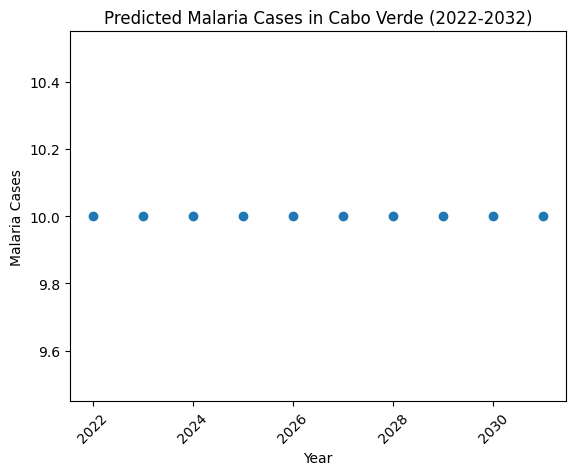

In [135]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = cabo_verde_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = cabo_verde_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_cabo_verde.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Cabo Verde (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


***Feature Engineering***

In [136]:
# Gambia
# Extract the target variable 'y'
y = gambia_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = gambia_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [137]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [138]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

Epoch 1/36
1/1 [==============================] - 2s 2s/step - loss: 0.0843 - val_loss: 0.0847
Epoch 2/36
1/1 [==============================] - 0s 42ms/step - loss: 0.0843 - val_loss: 0.0848
Epoch 3/36
1/1 [==============================] - 0s 38ms/step - loss: 0.0843 - val_loss: 0.0848
Epoch 4/36
1/1 [==============================] - 0s 40ms/step - loss: 0.0842 - val_loss: 0.0848
Epoch 5/36
1/1 [==============================] - 0s 40ms/step - loss: 0.0842 - val_loss: 0.0849
Epoch 6/36
1/1 [==============================] - 0s 39ms/step - loss: 0.0842 - val_loss: 0.0849
Epoch 7/36
1/1 [==============================] - 0s 41ms/step - loss: 0.0841 - val_loss: 0.0849
Epoch 8/36
1/1 [==============================] - 0s 41ms/step - loss: 0.0841 - val_loss: 0.0850
Epoch 9/36
1/1 [==============================] - 0s 40ms/step - loss: 0.0840 - val_loss: 0.0850
Epoch 10/36
1/1 [==============================] - 0s 38ms/step - loss: 0.0840 - val_loss: 0.0850
Epoch 11/36
1/1 [==============

In [139]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/

Best Parameters:  {'batch_size': 16, 'epochs': 20, 'optimizer': 'adam'}


In [141]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_gambia = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_gambia.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_gambia.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

1/1 [==============================] - 0s 307ms/step
Mean Squared Error: 0.0915


***Predicting the number of malaria cases from 2022 to 2032***

1/1 [==============================] - 0s 313ms/step


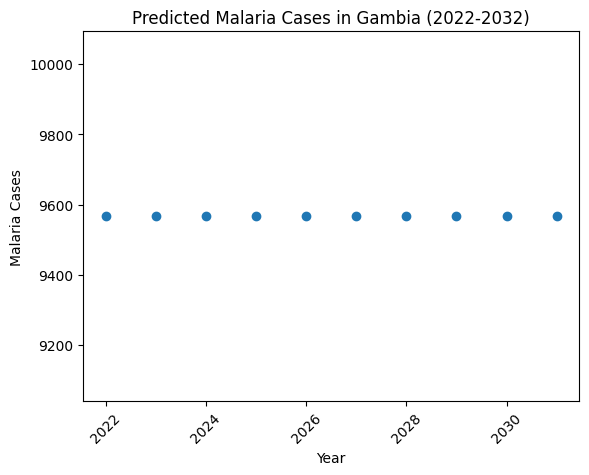

In [142]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = gambia_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = gambia_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_gambia.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Gambia (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [143]:
# Ghana
# Extract the target variable 'y'
y = ghana_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = ghana_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [144]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [145]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

Epoch 1/36
1/1 [==============================] - 2s 2s/step - loss: 0.1270 - val_loss: 0.1229
Epoch 2/36
1/1 [==============================] - 0s 46ms/step - loss: 0.1270 - val_loss: 0.1228
Epoch 3/36
1/1 [==============================] - 0s 43ms/step - loss: 0.1270 - val_loss: 0.1228
Epoch 4/36
1/1 [==============================] - 0s 41ms/step - loss: 0.1270 - val_loss: 0.1227
Epoch 5/36
1/1 [==============================] - 0s 45ms/step - loss: 0.1270 - val_loss: 0.1227
Epoch 6/36
1/1 [==============================] - 0s 47ms/step - loss: 0.1270 - val_loss: 0.1227
Epoch 7/36
1/1 [==============================] - 0s 48ms/step - loss: 0.1270 - val_loss: 0.1226
Epoch 8/36
1/1 [==============================] - 0s 45ms/step - loss: 0.1270 - val_loss: 0.1226
Epoch 9/36
1/1 [==============================] - 0s 52ms/step - loss: 0.1269 - val_loss: 0.1226
Epoch 10/36
1/1 [==============================] - 0s 51ms/step - loss: 0.1269 - val_loss: 0.1226
Epoch 11/36
1/1 [==============

In [146]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/

Best Parameters:  {'batch_size': 16, 'epochs': 20, 'optimizer': 'adam'}


In [147]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_ghana = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_ghana.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_ghana.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

1/1 [==============================] - 0s 332ms/step
Mean Squared Error: 0.1113


***Predicting the number of malaria cases from 2022 to 2032***

1/1 [==============================] - 0s 208ms/step


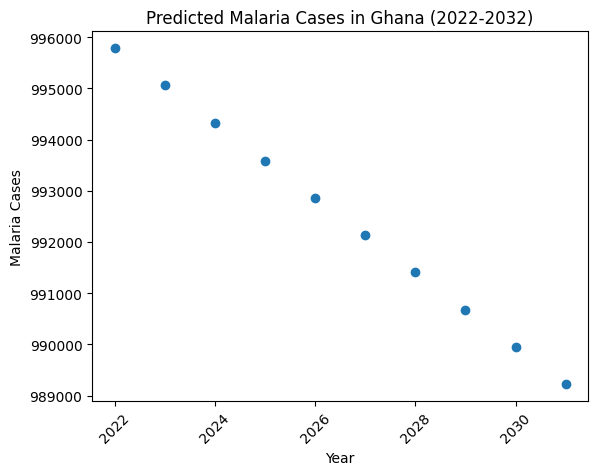

In [148]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = ghana_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = ghana_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_ghana.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Ghana (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


***Feature Engineering***

In [149]:
# Guinea
# Extract the target variable 'y'
y = guinea_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = guinea_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [150]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [151]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

Epoch 1/36
1/1 [==============================] - 2s 2s/step - loss: 0.1529 - val_loss: 0.2033
Epoch 2/36
1/1 [==============================] - 0s 39ms/step - loss: 0.1529 - val_loss: 0.2032
Epoch 3/36
1/1 [==============================] - 0s 41ms/step - loss: 0.1528 - val_loss: 0.2032
Epoch 4/36
1/1 [==============================] - 0s 44ms/step - loss: 0.1528 - val_loss: 0.2031
Epoch 5/36
1/1 [==============================] - 0s 48ms/step - loss: 0.1528 - val_loss: 0.2030
Epoch 6/36
1/1 [==============================] - 0s 44ms/step - loss: 0.1527 - val_loss: 0.2029
Epoch 7/36
1/1 [==============================] - 0s 41ms/step - loss: 0.1527 - val_loss: 0.2029
Epoch 8/36
1/1 [==============================] - 0s 45ms/step - loss: 0.1527 - val_loss: 0.2028
Epoch 9/36
1/1 [==============================] - 0s 45ms/step - loss: 0.1526 - val_loss: 0.2027
Epoch 10/36
1/1 [==============================] - 0s 43ms/step - loss: 0.1526 - val_loss: 0.2026
Epoch 11/36
1/1 [==============

In [ ]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/

In [ ]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_guinea = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_guinea.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_guinea.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

***Predicting the number of malaria cases from 2022 to 2032***

In [ ]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = guinea_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = guinea_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_guinea.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Guinea (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [ ]:
# Guinea-Bissau
# Extract the target variable 'y'
y = guinea_bissau_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = guinea_bissau_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluating and optimisation***

In [ ]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [ ]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

In [ ]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

In [ ]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_benin = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_benin.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_guinea_bissau.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

***Predicting the number of malaria cases from 2022 to 2032***

In [ ]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = guinea_bissau_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = guinea_bissau_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_guinea_bissau.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Guinea bissau (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [ ]:
# Liberia
# Extract the target variable 'y'
y = liberia_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = liberia_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [ ]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [ ]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

In [ ]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

In [ ]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_benin = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_benin.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_liberia.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))


***Predicting the number of malaria cases from 2022 to 2032***

In [ ]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = liberia_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = liberia_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_liberia.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Liberia (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [ ]:
# Mali
# Extract the target variable 'y'
y = mali_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = mali_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [ ]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [ ]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

In [ ]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

In [ ]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_benin = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_benin.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_mali.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

***Predicting the number of malaria cases from 2022 to 2032***

In [ ]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = mali_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = mali_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_mali.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Mali (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [ ]:
# Mauritania
# Extract the target variable 'y'
y = mauritania_scaled_df['Scaled Number of Malaria Cases'].values


# Extract the features (assuming you have only one feature 'Year')
x = mauritania_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [ ]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [ ]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

In [ ]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

In [ ]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_benin = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_benin.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_mauritania.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

***Predicting the number of malaria cases from 2022 to 2032***

In [ ]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = mauritania_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = mauritania_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_mauritania.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Mauritania (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [ ]:
# Niger
# Extract the target variable 'y'
y = niger_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = niger_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [ ]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [ ]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

In [ ]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

In [ ]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_benin = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_benin.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_niger.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

***Predicting the number of malaria cases from 2022 to 2032***

In [ ]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = niger_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = niger_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_niger.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Niger (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


***Feature Engineering***

In [ ]:
# Nigeria
# Extract the target variable 'y'
y = nigeria_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = nigeria_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [ ]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [ ]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

In [ ]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

In [ ]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_benin = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_benin.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_nigeria.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))


***Predicting the number of malaria cases from 2022 to 2032***

In [ ]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = nigeria_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = nigeria_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_nigeria.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Nigeria (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [ ]:
# Senegal
# Extract the target variable 'y'
y = senegal_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = senegal_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [ ]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [ ]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

In [ ]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

In [ ]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_benin = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_benin.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_senegal.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

***Predicting the number of malaria cases from 2022 to 2032***

In [ ]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = senegal_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = senegal_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_senegal.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Senegal (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [ ]:
# Sierra Leone
# Extract the target variable 'y'
y = sierra_leone_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = sierra_leone_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [ ]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [ ]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

In [ ]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

In [ ]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_sierra_leone = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_sierra_leone.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_sierra_leone.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

***Predicting the number of malaria cases from 2022 to 2032***

In [ ]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = sierra_leone_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = sierra_leone_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_sierra_leone.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Sierra Leone (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

***Feature Engineering***

In [ ]:
# Togo
# Extract the target variable 'y'
y = togo_scaled_df['Scaled Number of Malaria Cases'].values

# Extract the features (assuming you have only one feature 'Year')
x = togo_scaled_df['Year'].values

# Reshape 'x' to match the input shape expected by your model
x = x.reshape(-1, 1)

# Split the data into training, validation, and test sets
train_size = 0.6  # The training set will be 60% of the data
val_size = 0.2   # The validation and test sets will each be 20%

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=val_size/(val_size + (1 - train_size)), random_state=42)

***Training, evaluation and optimisation***

In [ ]:
def train_lstm_model(epochs=1000, batch_size=32, optimizer='adam'):

    # Keras Sequential API model with input shape
    lstm_model = Sequential()
    lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
    lstm_model.add(Dense(12, activation="relu"))
    lstm_model.add(Dense(1, activation="sigmoid"))

    # Use Mean Squared Error (MSE) as the loss function for regression
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

    return lstm_model

In [ ]:
# Training without GridSearch and Cross Validation

lstm_model = Sequential()
lstm_model.add(LSTM(24, activation="relu", input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(12, activation="relu"))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

lstm_model.fit(x_train, y_train, epochs=36, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on training set
mse_train = lstm_model.evaluate(x_train, y_train)
print(f'Training Mean Squared Error: {mse_train:.4f}')

# Evaluate on test set
mse_test = lstm_model.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse_test:.4f}')

In [ ]:
# Training with Grid Search and Cross Validation
lstm_model = KerasRegressor(build_fn=train_lstm_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

In [ ]:
# Get the best parameters
best_params = grid_result.best_params_

# Create and train the optimized model
optimized_model_togo = train_lstm_model(optimizer=best_params['optimizer'])
optimized_model_togo.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Make predictions on the test set
y_pred = optimized_model_togo.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

***Predicting the number of malaria cases from 2022 to 2032***

In [ ]:
# A dataframe with the years and corresponding malaria cases:
years = np.arange(2022, 2032)  # 2022 to 2032

data = {'Year': years}
df_predict = pd.DataFrame(data)

# Assuming the model takes a certain format of input data, adjust accordingly
# For example, if the model expects a 2D array, you might need to reshape the data.
input_data = df_predict['Year'].values.reshape(-1, 1)

max_malaria_cases = togo_melted_df['Number of Malaria Cases'].max()
min_malaria_cases = togo_melted_df['Number of Malaria Cases'].min()

# Make predictions
predictions = optimized_model_togo.predict(input_data)

# Unscaling using a for loop
unscaled_predictions = []
for scaled_value in predictions:
    unscaled_value = scaled_value * (max_malaria_cases - min_malaria_cases) + min_malaria_cases
    unscaled_predictions.append(unscaled_value)

# Convert the list to a NumPy array
unscaled_predictions = np.array(unscaled_predictions)

# Create a scatter plot
plt.scatter(years, unscaled_predictions, label='Forecasted Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Predicted Malaria Cases in Togo (2022-2032)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()